# Practica 3

Un dataset de NOAA está almacenado en el archivo `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **id** : código de identificación de la estación
- **date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**, y las estaciones de donde provienen los datos se muestran en el siguiente mapa.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Cargar el conjunto de datos
def leer_datos(archivo):
    # Lee el conjunto de datos desde el archivo CSV proporcionado
    data = pd.read_csv('../data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
    return data
data = leer_datos('../data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')


* GRAFICO LINEAL DE LAS TEMPERATURAS MAXIMAS Y MINIMAS RECORD

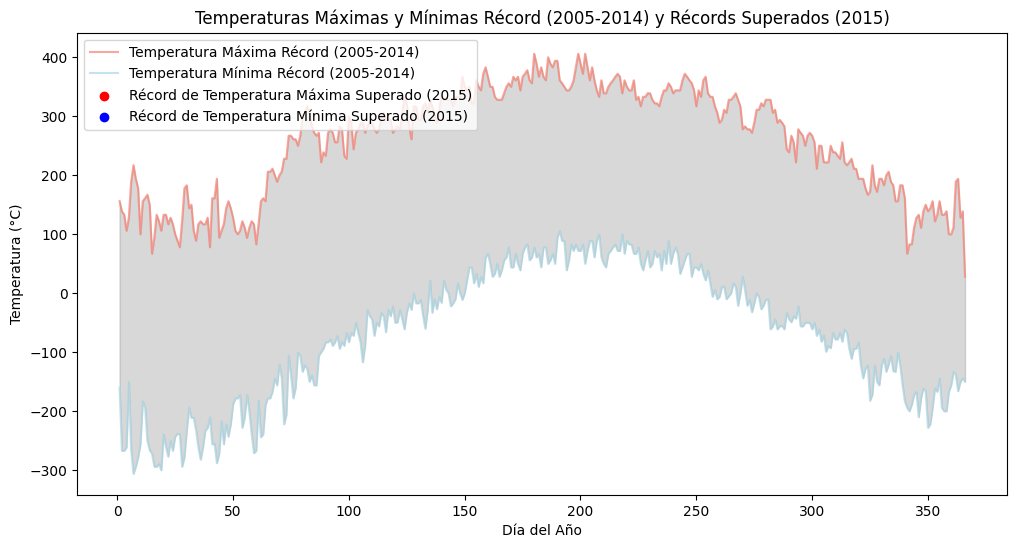

In [4]:
# Convertir la columna 'date' en tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Filtrar datos para el período 2005-2014
data = data[(data['Date'] >= '2005-01-01') & (data['Date'] <= '2014-12-31')]

# Eliminar días bisiestos (29 de febrero)
data = data[~((data['Date'].dt.month == 2) & (data['Date'].dt.day == 29))]

# Crear columnas separadas para año y día del año
data['Year'] = data['Date'].dt.year
data['Day_of_Year'] = data['Date'].dt.dayofyear

# Filtrar temperaturas máximas (TMAX) y mínimas (TMIN)
max_temperatures = data[data['Element'] == 'TMAX']
min_temperatures = data[data['Element'] == 'TMIN']

# Encontrar las temperaturas máximas récord por día del año (2005-2014)
max_record_temperatures = max_temperatures.groupby('Day_of_Year')['Data_Value'].max()

# Encontrar las temperaturas mínimas récord por día del año (2005-2014)
min_record_temperatures = min_temperatures.groupby('Day_of_Year')['Data_Value'].min()

# Cargar datos de 2015
data_2015 = data[data['Year'] == 2015]

# Encontrar las temperaturas máximas y mínimas de 2015
max_temperatures_2015 = data_2015[data_2015['Element'] == 'TMAX']
min_temperatures_2015 = data_2015[data_2015['Element'] == 'TMIN']

# Encontrar los puntos de 2015 que superaron los récords de 2005-2014
max_record_exceeded = max_temperatures_2015.groupby('Day_of_Year')['Data_Value'].max()
min_record_exceeded = min_temperatures_2015.groupby('Day_of_Year')['Data_Value'].min()

# Crear un gráfico lineal
plt.figure(figsize=(12, 6))

# Líneas de récords históricos
plt.plot(max_record_temperatures.index, max_record_temperatures.values, color='salmon', label='Temperatura Máxima Récord (2005-2014)', alpha=0.7)
plt.plot(min_record_temperatures.index, min_record_temperatures.values, color='lightblue', label='Temperatura Mínima Récord (2005-2014)', alpha=0.7)


# Superponer los puntos de 2015 que superaron récords
plt.scatter(max_record_exceeded.index, max_record_exceeded.values, color='red', label='Récord de Temperatura Máxima Superado (2015)')
plt.scatter(min_record_exceeded.index, min_record_exceeded.values, color='blue', label='Récord de Temperatura Mínima Superado (2015)')

# Rellenar el área entre las temperaturas máximas y mínimas récord
plt.fill_between(max_record_temperatures.index, min_record_temperatures.values, max_record_temperatures.values, color='gray', alpha=0.3)

# Configurar el gráfico
plt.title('Temperaturas Máximas y Mínimas Récord (2005-2014) y Récords Superados (2015)')
plt.xlabel('Día del Año')
plt.ylabel('Temperatura (°C)')
plt.legend(loc='upper left')

#plt.grid(True)

# Mostrar el gráfico
plt.show()